# Régression Linéaire Multiple

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Régression Multiples Variables

### 1.1 Dataset

In [4]:
pd.read_excel('tg.xlsx')
df = pd.read_excel('tg.xlsx')
df.head()

,PC (mmH2O),DV (t/h),VR (tr/min),TV (°C),PE (MW)
0,712.995789,231.413406,3002.122314,452.617828,55.856407
1,713.796997,230.703949,3001.251221,452.889404,54.910316
2,711.194092,230.742188,3001.751465,452.796936,55.240372
3,710.792725,230.413254,3000.750000,452.700378,54.275158
4,715.920410,230.749146,3001.125244,452.089355,53.776802


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [35]:
X = df.drop(['VR (tr/min)','TV (°C)', 'PE (MW)'], axis=1).values

y = df['PE (MW)'].values.reshape(-1,1)

<IPython.core.display.Javascript object>


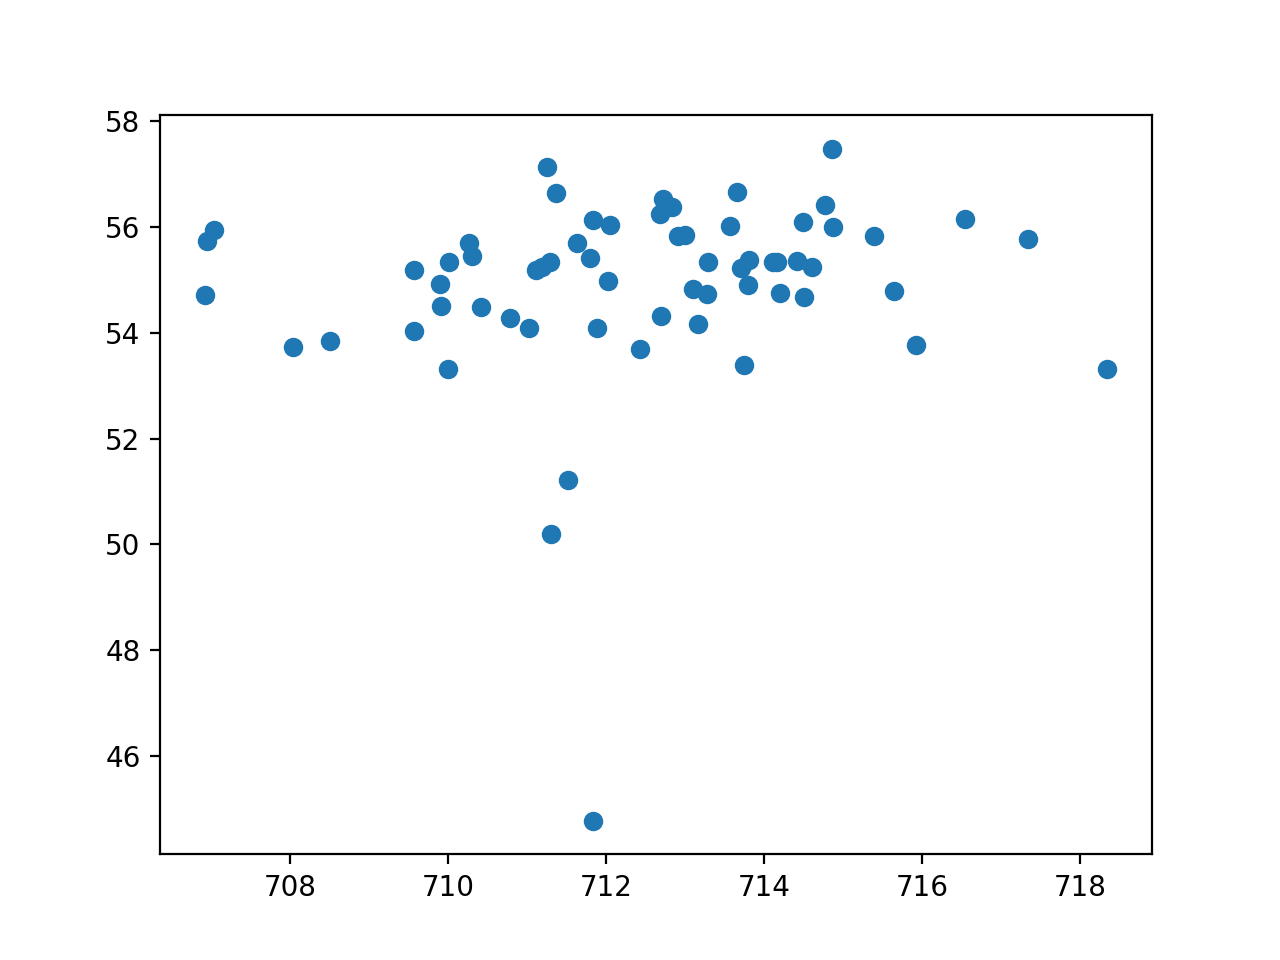

In [25]:
plt.scatter(X[:,0], y) # afficher les résultats. x_1 en abscisse et y en ordonnée

<IPython.core.display.Javascript object>


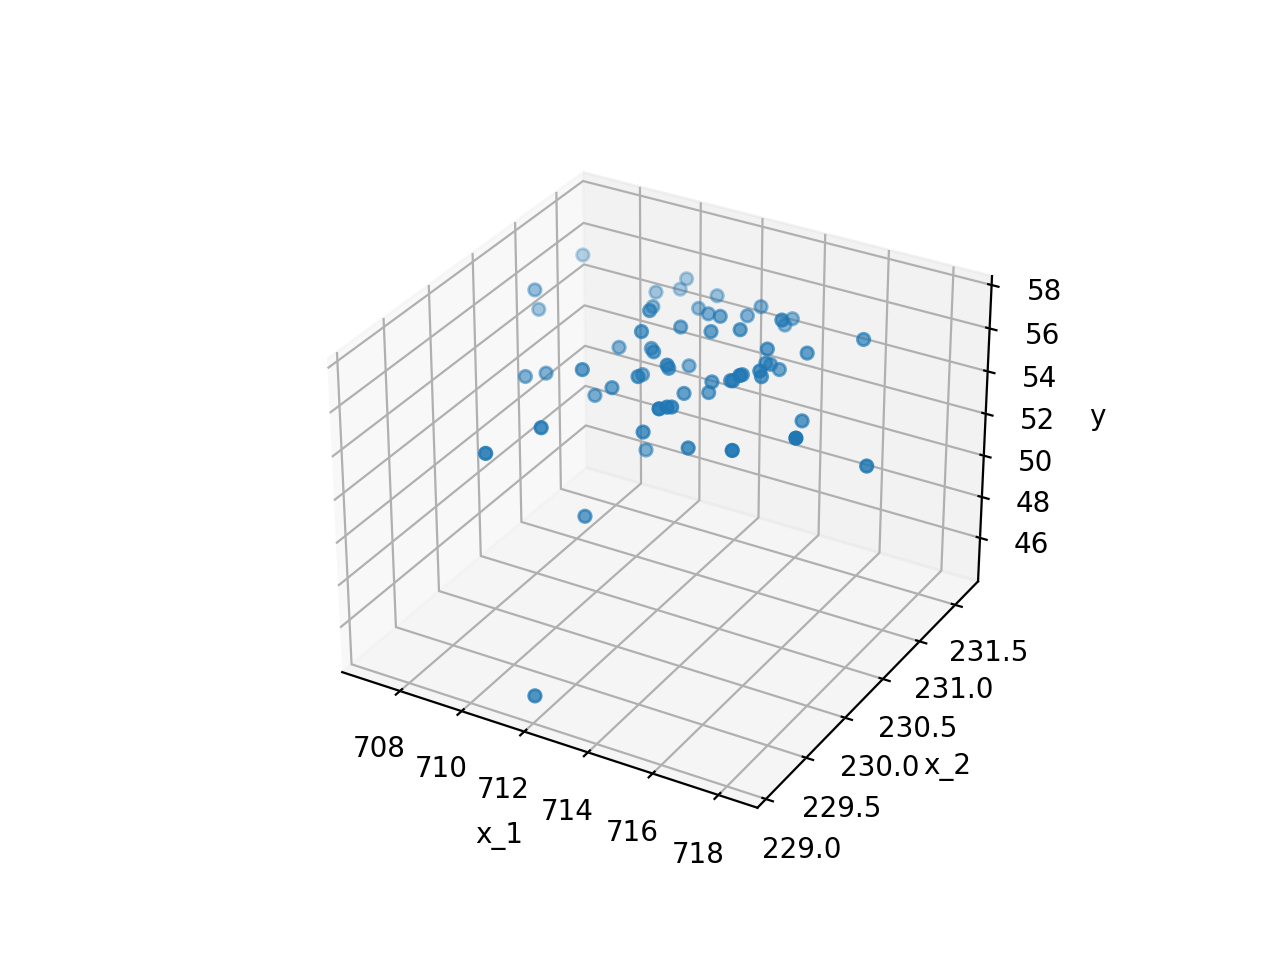

Text(0.5, 0, 'y')

In [26]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook 
#activez cette ligne pour manipuler le graph 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], y) # affiche en 3D la variable x_1, x_2, et la target y

# affiche les noms des axes
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

In [36]:
# Verification des dimensions
print(X.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(63, 2)
(63, 1)
(63, 1)


In [37]:
# Création de la matrice X, inclut le Biais
X = np.hstack((X, np.ones((X.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

print(X.shape)
print(X[:10])

(63, 3)
[[712.99578857 231.41340637   1.        ]
 [713.79699707 230.70394897   1.        ]
 [711.1940918  230.7421875    1.        ]
 [710.79272461 230.41325378   1.        ]
 [715.92041016 230.74914551   1.        ]
 [713.74963379 230.19917297   1.        ]
 [711.51873779 230.54776001   1.        ]
 [708.50567627 230.47200012   1.        ]
 [710.00183105 230.50274658   1.        ]
 [711.02642822 230.69650269   1.        ]]


In [ ]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

### 1.2 Modèle Linéaire

In [38]:
from sklearn import linear_model
mlr = linear_model.LinearRegression()

In [40]:
mlr.fit(X, y)

LinearRegression()

In [42]:
print('Intercept:', mlr.intercept_)
print('Coefficient:', mlr.coef_)

Intercept: [-431.29654597]
Coefficient: [[0.11645753 1.74789671 0.        ]]


In [47]:
theta =(mlr.coef_,  mlr.intercept_)
theta

(array([[0.11645753, 1.74789671, 0.        ]]), array([-431.29654597]))

In [48]:
def model(X, theta):
    return X.dot(theta)

<IPython.core.display.Javascript object>


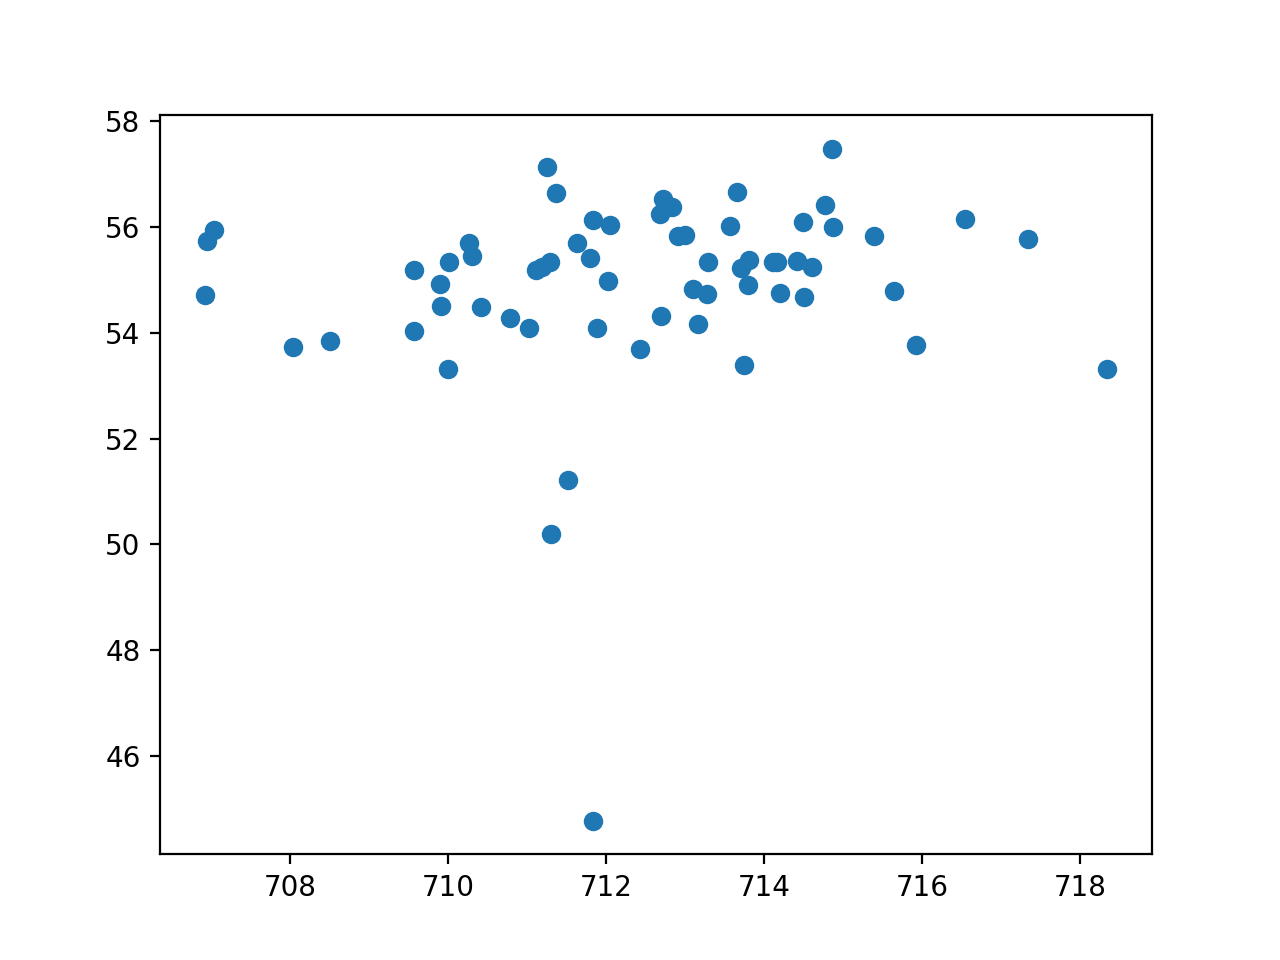

/var/folders/6b/whphg0ps3zqg99_x2s816sx40000gn/T/ipykernel_44831/989140962.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return X.dot(theta)


ValueError: could not broadcast input array from shape (3,) into shape (1,)

In [49]:
plt.scatter(X[:,0], y)
plt.scatter(X[:,0], model(X, theta), c='r')

### 1.3 Fonction Cout : Erreur Quadratique moyenne

In [138]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [139]:
cost_function(X, y, theta)

5300.618610202861

### 1.4 Gradients et Descente de Gradient

In [140]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [141]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    #cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        #cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta #, cost_history

### 1.5 Phase d'entrainement

In [142]:
n_iterations = 1000
learning_rate = 0.01

theta_final = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [143]:
theta_final

array([[28.67153869],
       [97.2952491 ],
       [-0.51147823]])

In [144]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], predictions, c='r')

ValueError: s must be a scalar, or float array-like with the same size as x and y

### 1.6 Courbes d'apprentissage

Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout à travers les itérations. On est sensé obtenir une courbe qui diminue à chaque itération jusqu'à stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

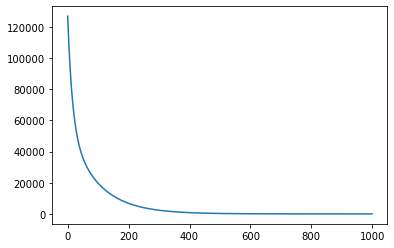

In [92]:
plt.plot(range(n_iterations), cost_history)

### 1.7 Evaluation finale

Pour évaluer la réelle performance de notre modèle avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le coefficient de détermination, aussi connu sous le nom R^2
. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modèle

In [46]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [95]:
coef_determination(y, predictions)

0.9287185416830875